In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emanattia","key":"b427e3936a814622979d4286f9e6edaf"}'}

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 98% 226M/230M [00:03<00:00, 54.6MB/s]
100% 230M/230M [00:03<00:00, 67.6MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "sarscov2-ctscan-dataset.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


In [ ]:
pip install split-folders

In [ ]:
import splitfolders as sf
#import split_folders as sf
input_folder = "/content/dataset"
output = "/content/COVID_DATASET"
#where you want the split datasets saved. one will be created if none is set

sf.ratio(input_folder, output="output", seed=42, ratio=(.8, .1,.1))
# ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 2481 files [00:00, 3399.77 files/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.optimizers import SGD
import keras
from keras.models import *
from keras.layers import *
import numpy as np
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/output/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/output/val", target_size=(224,224))

Found 1984 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
model=VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
for layers in (model.layers)[:19]:
  print(layers)
  layers.trainable = False

In [ ]:
x= model.layers[-2].output
predictions = Dense(2, activation='softmax')(x)
model_final= Model(inputs=model.input , outputs=predictions)

In [ ]:
from keras import optimizers
model_final.compile(loss='categorical_crossentropy',optimizer= optimizers.SGD(lr=0.0001,momentum=0.9),metrics=['accuracy'])

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model_final.fit_generator(steps_per_epoch=2,
                           generator=traindata,
                           validation_data= testdata,
                           validation_steps=1,
                           epochs=50,
                           callbacks=[checkpoint,early])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 10s 1s/step - loss: 1.1296 - accuracy: 0.4583 - val_loss: 0.7535 - val_accuracy: 0.6562

Epoch 00001: val_accuracy improved from -inf to 0.65625, saving model to vgg16_1.h5
Epoch 2/50
2/2 [==============================] - 1s 567ms/step - loss: 0.9050 - accuracy: 0.5833 - val_loss: 0.5826 - val_accuracy: 0.8125

Epoch 00002: val_accuracy improved from 0.65625 to 0.81250, saving model to vgg16_1.h5
Epoch 3/50
2/2 [==============================] - 1s 583ms/step - loss: 0.5021 - accuracy: 0.7812 - val_loss: 0.5726 - val_accuracy: 0.7500

Epoch 00003: val_accuracy did not improve from 0.81250
Epoch 4/50
2/2 [==============================] - 1s 590ms/step - loss: 0.7730 - accuracy: 0.6979 - val_loss: 0.6436 - val_accuracy: 0.8125

Epoch 00004: val_accuracy did not improve from 0.81250
Epoch 5/50
2/2 [==============================] - 1s 582ms/step - loss: 0.3350 - accuracy: 0.8854 - val_loss: 0.6714 - val_accuracy: 0.8438

Epoch 00005: val

In [ ]:
hist.history['accuracy']

[0.484375,
 0.546875,
 0.765625,
 0.6875,
 0.875,
 0.8125,
 0.75,
 0.875,
 0.75,
 0.890625,
 0.84375,
 0.765625,
 0.875,
 0.828125,
 0.65625,
 0.765625,
 0.90625,
 0.9375,
 0.96875,
 0.9375,
 0.921875,
 0.875,
 0.921875,
 0.921875,
 0.96875,
 0.953125,
 0.859375,
 0.9375,
 0.984375,
 0.90625,
 0.890625,
 1.0,
 0.9375,
 0.984375,
 0.953125,
 0.984375,
 0.953125]

Text(0.5, 0, 'epoch')

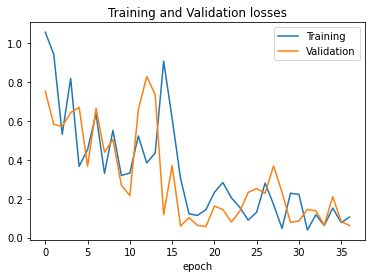

In [ ]:
hist.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

In [ ]:
saved_model=model_final.save('vgg16_1.h5')

In [ ]:
test_data = trdata.flow_from_directory(directory="/content/output/test",target_size=(224,224))

Found 250 images belonging to 2 classes.


In [ ]:
new_model=load_model('/content/vgg16_1.h5')

In [ ]:
pred=new_model.evaluate(test_data)
pred

8/8 [==============================] - 5s 627ms/step - loss: 0.1589 - accuracy: 0.9360


[0.15889552235603333, 0.9359999895095825]

normal


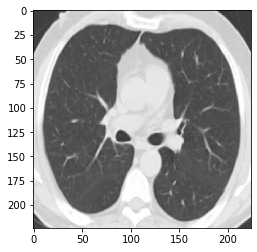

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/output/test/non-COVID/Non-Covid (1053).png',target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model('/content/vgg16_1.h5')
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print('covid')
else:
    print('normal')